# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [206]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import time
from datetime import date
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [140]:
# List for holding lat_lngs and cities
# Create cities as a List of Dictionaries with key {city}, values: [lat, lng, country]
lat_lngs = []
only_cities = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=40)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=40)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_data.city_name
    country = city_data.country_code
      
# If the city is unique, then add it to a our cities list
    if city not in only_cities:
        only_cities.append(city)
        cities.append({city:[lat_lng[0],lat_lng[1],country]})

# Print the city count to confirm sufficient count
print(len(cities))
print(len(lats))

cities

34
40


[{'arraial do cabo': [-41.00224754829607, -32.4762639009318, 'br']},
 {'seoul': [38.87888067661399, 128.25857016308942, 'kr']},
 {'pisco': [-18.121894409486657, -85.78746603150637, 'pe']},
 {'richards bay': [-29.964822412328594, 38.893449037847745, 'za']},
 {'illoqqortoormiut': [82.77171480674502, -19.074759496374497, 'gl']},
 {'bredasdorp': [-78.05859718814312, 24.064145123562554, 'za']},
 {'tura': [63.17489589151205, 102.25816628105787, 'ru']},
 {'touros': [-2.814659664704749, -30.485621553981105, 'br']},
 {'mataura': [-64.1482674438346, -152.06028290912263, 'pf']},
 {'hobart': [-86.21546693987895, 140.61475796808554, 'au']},
 {'vaini': [-54.92173611448036, -173.0611618431727, 'to']},
 {'busselton': [-40.49278051049272, 84.72107770656311, 'au']},
 {'saint-philippe': [-64.65707496303239, 69.10361173078047, 're']},
 {'nizhneyansk': [85.72937020859004, 138.71226481412373, 'ru']},
 {'ushuaia': [-71.07925013849898, -54.88461604584427, 'ar']},
 {'rikitea': [-79.47466877099185, -130.7654913

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [141]:
# Use Open Weather API to access weather data

# Get temperature in Fahrengeit
units="imperial"

# Specify the query url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Get All needed weather parameters for each city
print("Beginning Data Retrieval")
print("--------------------------------")

# Set data for loop - record counter and copy of cities list
cities_copy = [city for city in cities]
record_id=0

# Iterate through cities copy to get weather data for each city
for city in cities_copy:

    # Get Key from city Dictionary to get the city name    
    for key in city:
        
        try:
            print(f"Processing Record {record_id} | {key}")

            # Try all required responses first
            response = requests.get(url+key).json()
            temp = response["main"]["temp_max"]
            hum = response["main"]["humidity"]
            cld = response["clouds"]["all"]
            wind = response["wind"]["speed"]
            dt = response["dt"]

            # Add values to city dictionary     
            city[key].append(temp)
            city[key].append(hum)
            city[key].append(cld)
            city[key].append(wind)
            city[key].append(dt)
            
        # Catch exception if data for city is not foud in openweather API   
        except:
            
            print(f"City {key} not found. Skipping...")
            
            # Remove this city from cities list
            cities.remove(city)    
            
    record_id+=1
    
print("--------------------------------")        
print("Data Retrieval Complete")
print("--------------------------------")
print(len(cities))
cities

Beginning Data Retrieval
--------------------------------
Processing Record 0 | arraial do cabo
Processing Record 1 | seoul
Processing Record 2 | pisco
Processing Record 3 | richards bay
Processing Record 4 | illoqqortoormiut
City illoqqortoormiut not found. Skipping...
Processing Record 5 | bredasdorp
Processing Record 6 | tura
Processing Record 7 | touros
Processing Record 8 | mataura
Processing Record 9 | hobart
Processing Record 10 | vaini
Processing Record 11 | busselton
Processing Record 12 | saint-philippe
Processing Record 13 | nizhneyansk
City nizhneyansk not found. Skipping...
Processing Record 14 | ushuaia
Processing Record 15 | rikitea
Processing Record 16 | amuntai
Processing Record 17 | codrington
Processing Record 18 | mokhsogollokh
Processing Record 19 | jose de freitas
Processing Record 20 | hermanus
Processing Record 21 | carnarvon
Processing Record 22 | sentyabrskiy
City sentyabrskiy not found. Skipping...
Processing Record 23 | darhan
Processing Record 24 | ostrovno

[{'arraial do cabo': [-41.00224754829607,
   -32.4762639009318,
   'br',
   71.56,
   64,
   0,
   17.27,
   1627073387]},
 {'seoul': [38.87888067661399,
   128.25857016308942,
   'kr',
   78.4,
   86,
   0,
   1.14,
   1627073248]},
 {'pisco': [-18.121894409486657,
   -85.78746603150637,
   'pe',
   66.25,
   68,
   20,
   11.5,
   1627073081]},
 {'richards bay': [-29.964822412328594,
   38.893449037847745,
   'za',
   60.49,
   61,
   69,
   17.16,
   1627073438]},
 {'bredasdorp': [-78.05859718814312,
   24.064145123562554,
   'za',
   51.12,
   76,
   0,
   12.66,
   1627073439]},
 {'tura': [63.17489589151205,
   102.25816628105787,
   'ru',
   76.06,
   88,
   99,
   5.68,
   1627073439]},
 {'touros': [-2.814659664704749,
   -30.485621553981105,
   'br',
   79.7,
   77,
   5,
   16.42,
   1627073439]},
 {'mataura': [-64.1482674438346,
   -152.06028290912263,
   'pf',
   42.48,
   85,
   41,
   3.31,
   1627073440]},
 {'hobart': [-86.21546693987895,
   140.61475796808554,
   'au',
 

In [73]:
# Test cell
response = requests.get(url+'casa nova').json()
response

{'coord': {'lon': -41.1333, 'lat': -9.4167},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 84.18,
  'feels_like': 86.04,
  'temp_min': 84.18,
  'temp_max': 84.18,
  'pressure': 1017,
  'humidity': 53,
  'sea_level': 1017,
  'grnd_level': 974},
 'visibility': 10000,
 'wind': {'speed': 23.2, 'deg': 146, 'gust': 23.96},
 'clouds': {'all': 76},
 'dt': 1627064473,
 'sys': {'type': 1,
  'id': 8418,
  'country': 'BR',
  'sunrise': 1627030867,
  'sunset': 1627072835},
 'timezone': -10800,
 'id': 3402621,
 'name': 'Casa Nova',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [142]:
# Export Data to csv
# output_path = os.path.join("Output", "city_weather.csv")

# with open(output_path, 'w') as csvfile:

#     # Initialize csv.writer
#     csv_writer = csv.writer(csvfile, delimiter=',')
    
#     csv_writer.writerow(
#         ["City ID", "City", "Lat", "Lang", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
    
# both following writer write in one column   
# 1------
# for i in range(len(cities)):
#         csv_writer.writerow([i, cities[i]])
        
# 2 -----------
#     for i in range(len(cities)):
#         values=[]
#         for key in cities[i]:
#             values.append(key)
# #             print(cities[i])
# #             print(key)
#             for value in cities[i][key]:
#                 values.append(value)
# #                 print(value)
# #                 print(row)
#         csv_writer.writerow([i, values])
        
     
# # Create an empty DataFrame with required columns
city_weather = pd.DataFrame(
    columns=["Lat", "Lang", "Country", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])

# Add data for each city into DataFrame via df.append()
for city in cities:
    
    # Create DataFrame from city Dictionary with orient=index to have key as an index     
    city_df = pd.DataFrame.from_dict(
        city,
        orient = 'index',
        columns=["Lat", "Lang", "Country", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])
  
    city_weather = city_weather.append(city_df)

city_weather.index.name = "City"

city_weather.to_csv("Output/city_weather.csv")

city_weather

,Lat,Lang,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
arraial do cabo,-41.002248,-32.476264,br,71.56,64,0,17.27,1627073387
seoul,38.878881,128.258570,kr,78.40,86,0,1.14,1627073248
pisco,-18.121894,-85.787466,pe,66.25,68,20,11.50,1627073081
richards bay,-29.964822,38.893449,za,60.49,61,69,17.16,1627073438
bredasdorp,-78.058597,24.064145,za,51.12,76,0,12.66,1627073439
tura,63.174896,102.258166,ru,76.06,88,99,5.68,1627073439
touros,-2.814660,-30.485622,br,79.70,77,5,16.42,1627073439
mataura,-64.148267,-152.060283,pf,42.48,85,41,3.31,1627073440
hobart,-86.215467,140.614758,au,45.27,85,40,1.99,1627073440


In [169]:
len(city_weather)

29

In [147]:
# convert to float
city_weather["Humidity"] = city_weather["Humidity"].astype(float)
city_weather["Cloudiness"] = city_weather["Cloudiness"].astype(float)

# Add statistics
city_weather.describe()

,Lat,Lang,Max Temp,Humidity,Cloudiness,Wind Speed
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,-11.107676,16.870064,62.364828,76.586207,49.137931,9.777586
std,51.588962,98.795272,15.453366,15.221032,38.178831,7.180515
min,-86.215467,-173.061162,40.620000,31.000000,0.000000,1.140000
25%,-54.921736,-47.602801,48.160000,67.000000,8.000000,3.380000
50%,-18.121894,24.064145,60.570000,80.000000,41.000000,7.670000
75%,38.878881,108.052297,75.360000,87.000000,80.000000,16.330000
max,72.218167,176.120505,92.350000,97.000000,100.000000,22.550000


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [178]:
# insert humidity > 100
hum_df = pd.DataFrame(city_weather)
hum_df.iloc[5,4]=110
hum_df.iloc[2,4]=120
hum_df.iloc[28,4]=101
hum_df.iloc[0,4]=103
hum_df

,Lat,Lang,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
arraial do cabo,-41.002248,-32.476264,br,71.56,103.0,0.0,17.27,1627073387
seoul,38.878881,128.258570,kr,78.40,86.0,0.0,1.14,1627073248
pisco,-18.121894,-85.787466,pe,66.25,120.0,20.0,11.50,1627073081
richards bay,-29.964822,38.893449,za,60.49,61.0,69.0,17.16,1627073438
bredasdorp,-78.058597,24.064145,za,51.12,76.0,0.0,12.66,1627073439
tura,63.174896,102.258166,ru,76.06,110.0,99.0,5.68,1627073439
touros,-2.814660,-30.485622,br,79.70,77.0,5.0,16.42,1627073439
mataura,-64.148267,-152.060283,pf,42.48,85.0,41.0,3.31,1627073440
hobart,-86.215467,140.614758,au,45.27,85.0,40.0,1.99,1627073440


In [179]:
# # check humidity
humidity_is_greater_100 = False

indices = []
for index, row in hum_df.iterrows():
    if hum_df.loc[index,"Humidity"]>100:
        indices.append(index)
indices

['arraial do cabo', 'pisco', 'tura', 'kholodnyy']

In [180]:
if len(hum_df.loc[hum_df["Humidity"]>100]) != 0:
    humidity_is_greater_100 = True
humidity_is_greater_100

if humidity_is_greater_100:
    clean_df = hum_df.drop(indices, inplace = False)
clean_df

,Lat,Lang,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
seoul,38.878881,128.258570,kr,78.40,86.0,0.0,1.14,1627073248
richards bay,-29.964822,38.893449,za,60.49,61.0,69.0,17.16,1627073438
bredasdorp,-78.058597,24.064145,za,51.12,76.0,0.0,12.66,1627073439
touros,-2.814660,-30.485622,br,79.70,77.0,5.0,16.42,1627073439
mataura,-64.148267,-152.060283,pf,42.48,85.0,41.0,3.31,1627073440
hobart,-86.215467,140.614758,au,45.27,85.0,40.0,1.99,1627073440
vaini,-54.921736,-173.061162,to,75.36,94.0,40.0,3.44,1627073441
busselton,-40.492781,84.721078,au,48.09,61.0,99.0,14.50,1627073022
saint-philippe,-64.657075,69.103612,re,67.59,72.0,33.0,7.67,1627073339


In [181]:
hum_df

,Lat,Lang,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
arraial do cabo,-41.002248,-32.476264,br,71.56,103.0,0.0,17.27,1627073387
seoul,38.878881,128.258570,kr,78.40,86.0,0.0,1.14,1627073248
pisco,-18.121894,-85.787466,pe,66.25,120.0,20.0,11.50,1627073081
richards bay,-29.964822,38.893449,za,60.49,61.0,69.0,17.16,1627073438
bredasdorp,-78.058597,24.064145,za,51.12,76.0,0.0,12.66,1627073439
tura,63.174896,102.258166,ru,76.06,110.0,99.0,5.68,1627073439
touros,-2.814660,-30.485622,br,79.70,77.0,5.0,16.42,1627073439
mataura,-64.148267,-152.060283,pf,42.48,85.0,41.0,3.31,1627073440
hobart,-86.215467,140.614758,au,45.27,85.0,40.0,1.99,1627073440


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

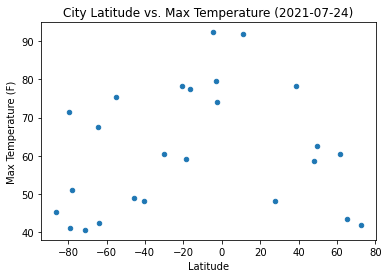

In [196]:
analysis_date = date.today()
lat_temp = clean_df.plot(kind = "scatter", x = "Lat", y = "Max Temp",
              title = f"City Latitude vs. Max Temperature ({analysis_date})")
lat_temp.set_xlabel("Latitude")
lat_temp.set_ylabel("Max Temperature (F)")

#### Latitude vs. Temperature Plot shows that the closer city is to the Equator (zero latitude) the higher the Max Temperature is.

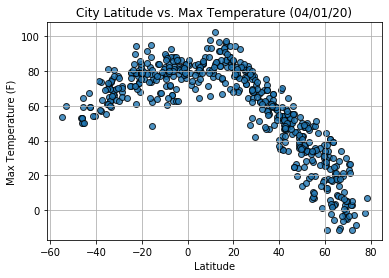

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

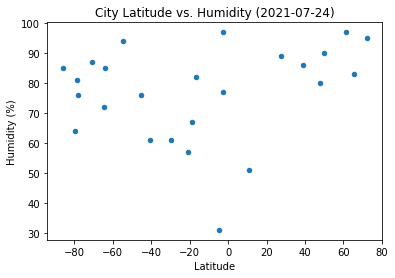

In [199]:
lat_hum = clean_df.plot(kind = "scatter", x = "Lat", y = "Humidity",
              title = f"City Latitude vs. Humidity ({analysis_date})")
lat_hum.set_xlabel("Latitude")
lat_hum.set_ylabel("Humidity (%)")

#### Latitude vs. Humidity Plot shows that the closer city is to the Equator (zero latitude) the lower the Humidity is.

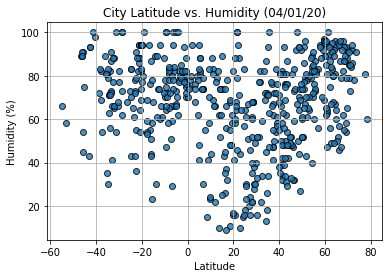

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

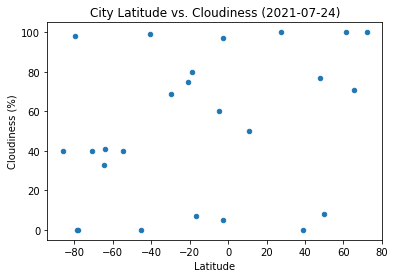

In [198]:
lat_cloud = clean_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness",
              title = f"City Latitude vs. Cloudiness ({analysis_date})")
lat_cloud.set_xlabel("Latitude")
lat_cloud.set_ylabel("Cloudiness (%)")

#### Latitude vs. Cloudiness Plot shows that the ?

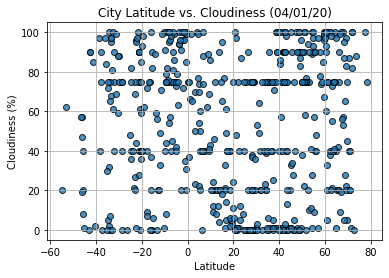

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

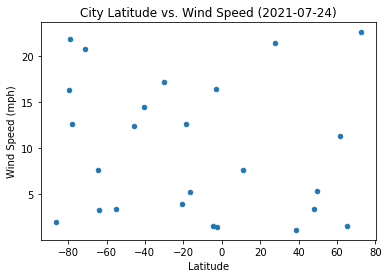

In [200]:
lat_wind = clean_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed",
              title = f"City Latitude vs. Wind Speed ({analysis_date})")
lat_wind.set_xlabel("Latitude")
lat_wind.set_ylabel("Wind Speed (mph)")

#### Latitude vs. Wind Speed Plot shows that cities in the Southern Hemisphere have higher measurements of Wind Speed.

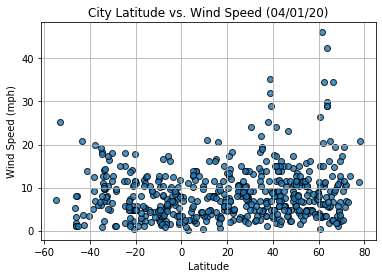

## Linear Regression

In [227]:
# Add function that calculates linear regreassion

# Calculate correlation usong scipy pearsonr method
def correlation(var1, var2):
    r_value = st.pearsonr(var1, var2)
    print(f"The r-value is {round(r_value[0],2)}")
    return r_value

# Calculate linear regression equation
def regression(var1, var2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(var1, var2)
    regress_values = var1 * slope + intercept
    return regress_values

def scatter_plot(dataFrame, x_value, y_value, regrX_values, regrY_values, x_label, y_label):
    plot = dataFrame.plot.scatter(x = x_value, y = y_value, s=40)
    plot.set_title(f"Linear Regression Model btw {y_label} and {x_label}")
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plt.plot(regrX_values,regrY_values,"r-")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.73


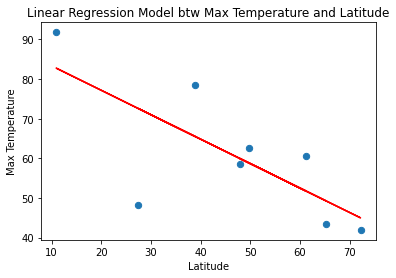

In [228]:
north_hem = clean_df.loc[clean_df["Lat"]>=0]

north_lat = north_hem["Lat"]
north_max_temp = north_hem["Max Temp"]

correlation(north_lat, north_max_temp)

# Generate Scatter plot with linear regression
scatter_plot(north_hem, "Lat", "Max Temp", north_lat,
             regression(north_lat, north_max_temp), "Latitude", "Max Temperature")
# scatter_plot = north_hem.plot.scatter(x = "Lat", y = "Max Temp", s=40)
# scatter_plot.set_title("Linear Regression Model btw Max Temp and Latitude in Northern Hemisphere")
# plt.plot(north_lat,regression(north_lat, north_max_temp),"r-")
# plt.show()

* There is a strong negative correlation between Max Temp and Latitude in Northern Hemisphere.
* That means that the more to the North the city is the less Max Temp it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.68


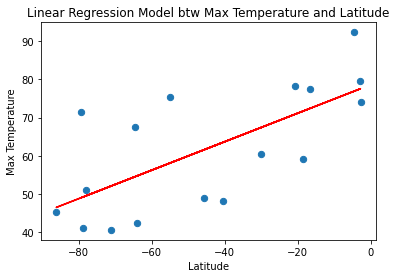

In [229]:
south_hem = clean_df.loc[clean_df["Lat"]<=0]

south_lat = south_hem["Lat"]
south_max_temp = south_hem["Max Temp"]

correlation(south_lat, south_max_temp)

# Generate Scatter plot with linear regression
scatter_plot(south_hem, "Lat", "Max Temp", south_lat,
             regression(south_lat, south_max_temp), "Latitude", "Max Temperature")
# scatter_plot = south_hem.plot.scatter(x = "Lat", y = "Max Temp", s=40)
# scatter_plot.set_title("Linear Regression Model btw Max Temp and Latitude in Southern Hemisphere")
# plt.plot(south_lat,regression(south_lat, south_max_temp),"r-")
# plt.show()

There is a strong positive correlation between Max Temp and Latitude in Southern Hemisphere.
That means that the more to the South the city is the greater Max Temp gets

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.74


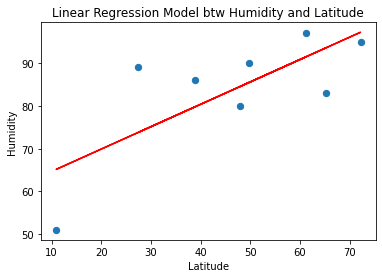

In [230]:
north_humidity = north_hem["Humidity"]

correlation(north_lat, north_humidity)

# Generate Scatter plot with linear regression
scatter_plot(north_hem, "Lat", "Humidity", north_lat,
             regression(north_lat, north_humidity), "Latitude", "Humidity")
# scatter_plot = north_hem.plot.scatter(x = "Lat", y = "Humidity", s=40)
# scatter_plot.set_title("Linear Regression Model btw Humidity and Latitude in Northern Hemisphere")
# plt.plot(north_lat,regression(north_lat, north_humidity),"r-")
# plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.31


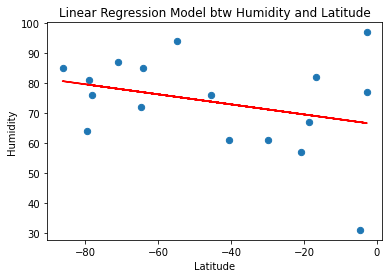

In [231]:
# south_hem = clean_df.loc[clean_df["Lat"]<=0]

# south_lat = south_hem["Lat"]
south_humidity = south_hem["Humidity"]

correlation(south_lat, south_humidity)

# Generate Scatter plot with linear regression
scatter_plot(south_hem, "Lat", "Humidity", south_lat,
             regression(south_lat, south_humidity), "Latitude", "Humidity")
# scatter_plot = south_hem.plot.scatter(x = "Lat", y = "Max Temp", s=40)
# scatter_plot.set_title("Linear Regression Model btw Max Temp and Latitude in Southern Hemisphere")
# plt.plot(south_lat,regression(south_lat, south_humidity),"r-")
# plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.3


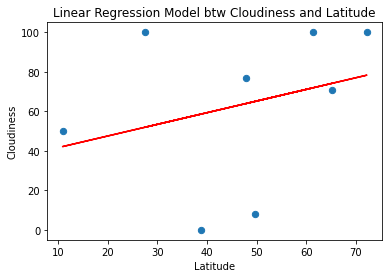

In [232]:
north_cloud = north_hem["Cloudiness"]

correlation(north_lat, north_cloud)

# Generate Scatter plot with linear regression
scatter_plot(north_hem, "Lat", "Cloudiness", north_lat,
             regression(north_lat, north_cloud), "Latitude", "Cloudiness")

The r-value is: 0.0020898727664228514


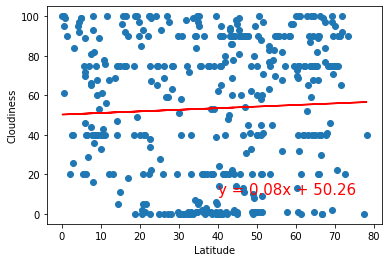

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.25


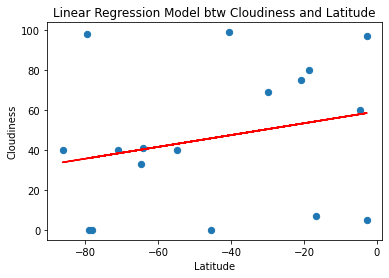

In [233]:
south_cloud = south_hem["Cloudiness"]

correlation(south_lat, south_cloud)

# Generate Scatter plot with linear regression
scatter_plot(south_hem, "Lat", "Cloudiness", south_lat,
             regression(south_lat, south_cloud), "Latitude", "Cloudiness")

The r-value is: 0.0035263772085582894


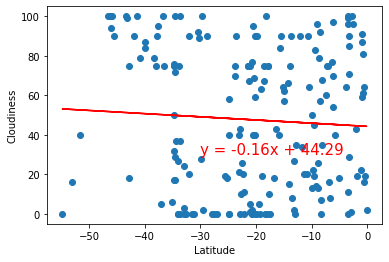

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.08


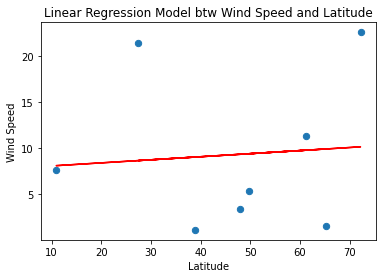

In [234]:
north_wind = north_hem["Wind Speed"]

correlation(north_lat, north_wind)

# Generate Scatter plot with linear regression
scatter_plot(north_hem, "Lat", "Wind Speed", north_lat,
             regression(north_lat, north_wind), "Latitude", "Wind Speed")

The r-value is: 0.04019723576144484


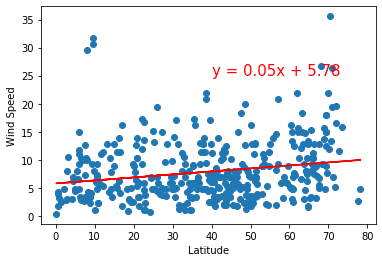

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.28


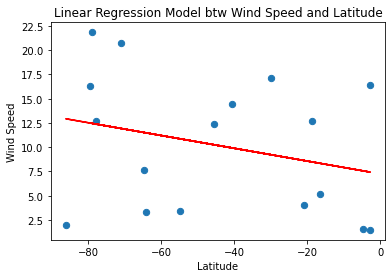

In [235]:
south_wind = south_hem["Wind Speed"]

correlation(south_lat, south_wind)

# Generate Scatter plot with linear regression
scatter_plot(south_hem, "Lat", "Wind Speed", south_lat,
             regression(south_lat, south_wind), "Latitude", "Wind Speed")

The r-value is: 0.017128274759839232


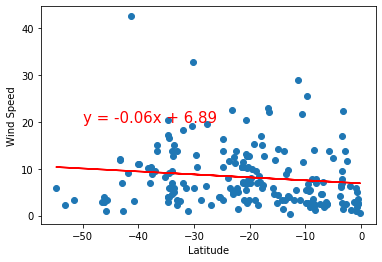